# Classifying Iris Species

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Meet the data

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

load_iris is a Bunch object, very similar to a dictionary:

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

target_names is an array of strings which contains the species of flowers that we want to predict:

In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

feature_names is a list of strings giving the description of each feature:

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Data contains measurements for 150 different flowers

In [6]:
iris['data'].shape

(150, 4)

**Individual items are called** *samples* **in machine learning and their properties are called** *features*

**The shape of the data array is the number of samples times the number of features**

The species are encoded as integers from 0 to 2:

In [7]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Here, 0 means Setosa, 1 means Versicolor and 2 means Virginica

# Measuring Success: Training and testing data

The goal is to predict the species of iris for a new set of measurements.

First, we need to know if the model works, that is wether we should trust its predictions. So we split the labeled data we already have (150 flower measurements) into two parts.

Data is usually denoted with a capital X, while labels are denoted by a lower-case y.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)  ## default = 25%

We fix the random_state parameter so the line will always have the same outcome.

X_train contains 75% of the rows of the dataset and X_test contains the remaining 25%:

In [9]:
print(X_train.shape, '\n', X_test.shape)

(112, 4) 
 (38, 4)


# Looking at the data

It is a good idea to inspect the data to see if the task is solvable without using machine learning, or if the desired information might no be contained in the data.

Plot of the features in the training set. Data points are colored according to the species the iris belongs to:

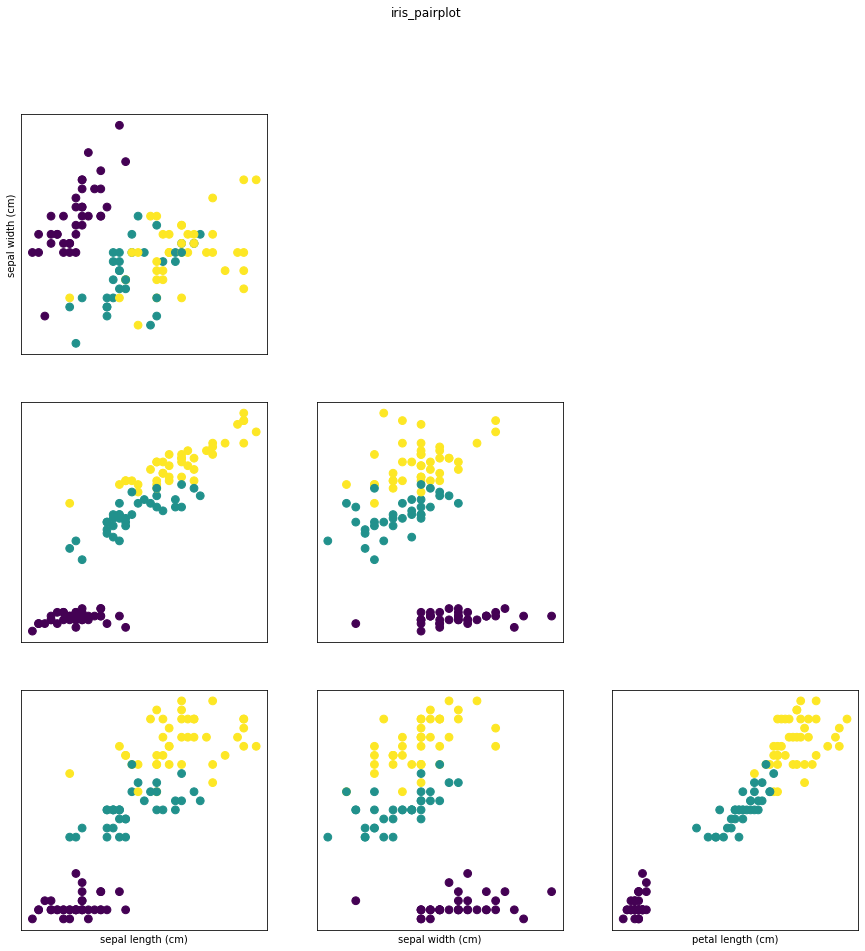

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))
plt.suptitle('iris_pairplot')

for i in range(3):
  for j in range(3):
    ax[i, j].scatter(X_train[:, j], X_train[:, i+1], c=y_train, s=60)
    ax[i, j].set_xticks(())
    ax[i, j].set_yticks(())
    if i == 2:
      ax[i, j].set_xlabel(iris['feature_names'][j])
    if i == 0:
      ax[i, j].set_ylabel(iris['feature_names'][i+1])
    if j > i:
      ax[i, j].set_visible(False)

We can see that three classes seem to be relatively well separated using the sepal and petal measurements. This means that a machine learning model will likely be able to learn to separate them.

# Model: K nearest neighbors

This algorithm consists of storing the training set. To make prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point. Then, assigns the label of this colsest data training point to the new data point.

The k stands for the fact that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training (closest 3 or 5 neighbors). Then, we can make a prediction using the majority class among these neighbors.

We will use only a single neighbor for now.

All machine learning models in scikit-learn are implemented in their own class, which are calle Estimator classes. The k nearest neighbors classification algorithm is implemented in the KNeighborsClassifier class in the neighbors module.

Before using the model, we need to instantiate the class into an object. This is when we will set any parameters of the model. The single parameter of KNeighborClassifier is the number of neighbors, which we will set to one:

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

The knn object encapsulates the algorithm to build the model from the training data, as well the algorithm to make predictions on new data points.

To build the model on the training set, we call the fit method of the knn object, which takes as arguments the numpy array X_train containing the training data and the numpy array y_train of the corresponding training labels:

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=1, p=2, weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

# Making predictions

If we were to find an iris in the wild with a sepal lenght of 5cm, a sepal width of 2.9cm, a petal lenght of 1cm and a petal width of 0.2cm. What species of iris would this be?

We can put this data into a numpy array with the shape number of samples (1) times the number of features (4):

In [13]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

To make the prediction we call the predict method of the knn object:

In [14]:
prediction = knn.predict(X_new)
prediction

array([0])

In [15]:
iris['target_names'][prediction]

array(['setosa'], dtype='<U10')

The model predicts that the new iris belongs to the class 0, which its species is Setosa. But we need to know that we can trust our model.

# Evaluating the model

We can now make a prediction for an iris in the test data and compare it against its label (the known species). We can meassure the performance of the model by computing the accuracy, which is the fraction of flowers for which the right species was predicted:

In [16]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.9736842105263158

We can also use the score method of the knn object, which will compute the test set accuracy for us:

In [17]:
knn.score(X_test, y_test)

0.9736842105263158

For this model, the test set accuracy is about 0.97, which means we made the right prediction for 97% of the irises in the test set.

# Analyzing KNeighborsClassifier

Using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simple model.

In other words, using few neighbors corresponds to high model complexity and using many neighbors corresponds to low model complexity.

We want to investigate wheter we can confirm the connection between model complexity and generalization using real world breast cancer dataset.

First, we split the dataset into the training and test set, so we can evaluate their performances with different numbers of neighbors.

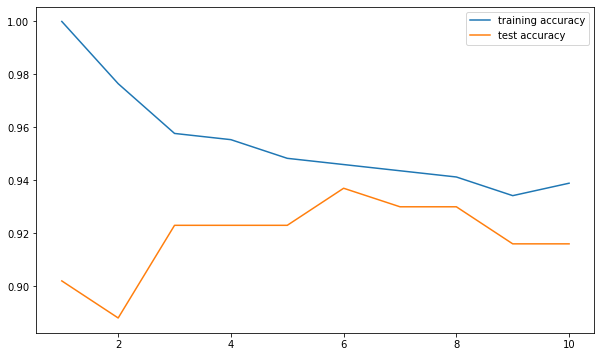

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, stratify=cancer.target,
                                                    random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)  ## n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  training_accuracy.append(clf.score(X_train, y_train))  ## record training set accuracy
  test_accuracy.append(clf.score(X_test, y_test))  ## record generalization accuracy

plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.legend()

Since the plot shows the training and test set accuracy on the y axis against the setting of n_neighbors on the x axis; we can see that fewer neighbors corresponds to a more complex model.

Considering a single nearest neighbor, the prediction on the training set is perfect, while considering more neighbors, the model becomes more simple and the training accuracy drops.

The test accuracy for using a single neighbor is lower than when using more neighbors, which indicates that a single nearest neighbor leads to a model that is too complex. When considering 10 neighbors, the model is too simple and performance is worse. In this case, the best performance is around six neighbors.

# k-Neighbors Regression

With the wave dataset, we start by using a single nearest neighbor. We added 3 test data points as green crosses on the x axis.

The prediction using a single neighbor is just the target value of the nearest neighbor, shown as the blue cross:

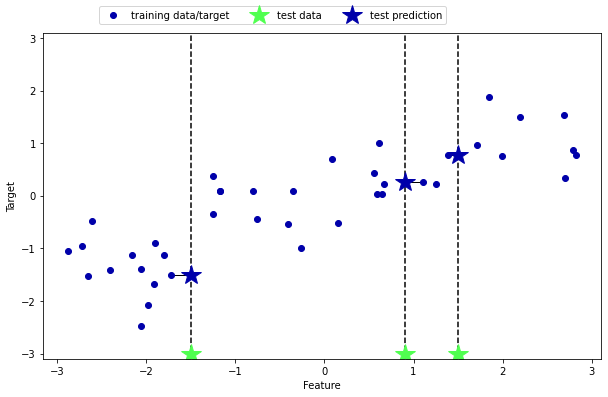

In [22]:
import mglearn
mglearn.plots.plot_knn_regression(n_neighbors=1)

When using multiple nearest neighbors for regression, the prediction is the average of the relevante neighbors:

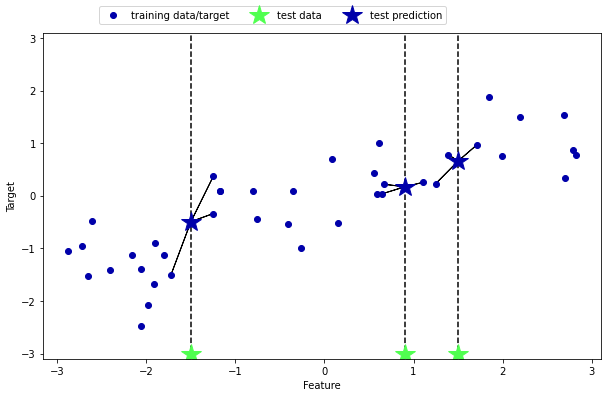

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

The k nearest neighbors algorithm for regression is implemented in the KNeighborsRegressor class in scikit-learn:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Instantiate the model:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                    weights='uniform')

Predictions on the test set:

In [25]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

Using the score method to evaluate the model gives us the $R^2$ score:

In [26]:
reg.score(X_test, y_test)

0.8344172446249605

# Analyzing k nearest neighbors regression

We can see how the predictions will look like for all possible feature values by creating a test-dataset consisting of many points on the line:

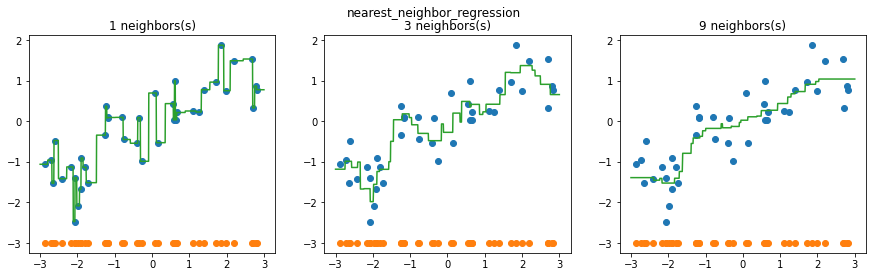

In [28]:
from IPython.core.pylabtools import figsize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
plt.suptitle('nearest_neighbor_regression')
for n_neighbors, ax in zip([1,3,9], axes):  ## make predictions using 1,3 or 9 neighbors
  reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
  ax.plot(X, y, 'o')
  ax.plot(X, -3 * np.ones(len(X)), 'o')
  ax.plot(line, reg.predict(line))
  ax.set_title('%d neighbors(s)' % n_neighbors)

The blue points are the responses for the training data, while the green line is the prediction made by the model for all points on the line.

One neighbor leads to a unsteady prediction. Considering more neighbors leads to smoother predictions but theses do not fit the training data as well.

# Strenghts, weaknesses and parameters

The two important parameters to the KNeighbors classifier are: the number of neighbors and how the distance is measure between data points. In practice, using 3 or 5 neighbors often works well.

The strenght of the model is that it is very easy to understand and often gives reasonable performance without a lot of adjustments. It is a good baseline method.

It is important to preprocess the data. Nearest neighbors does not perform well on datasets with too much features, in particular sparse datasets (data that has many features but only few of the features are non-zero for any given data point).